<a href="https://colab.research.google.com/github/psGitOrange/AdEase-TimeSeriesForecasting-Models/blob/main/AdEase_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AdEase - Time Series Forecasting Models

### **About AdEase**

Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTSGGqB27Li3IFoh_JIwopSTnnJmbzPz_a6lQ&s" alt="adease_img" width="250"/>

## Business Problem Statement:
You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

You are provided with the data of 145k wikipedia pages and daily view count for each of them.

**Concepts Used:**

- Exploratory data analysis
- Time Series forecasting- ARIMA, SARIMA, SARIMAX
- Time Series forecasting- Prophet

### Dataset

Datalink: https://drive.google.com/drive/folders/1mdgQscjqnCtdg7LGItomyK0abN6lcHBb


**Data Dictionary:**

There are two csv files given

1. train_1.csv: In the csv file, each row corresponds to a particular article and each column corresponds to a particular date. The values are the number of visits on that date.

  The page name contains data in this format:

  SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN

  having information about the page name, the main domain, the device type used to access the page, and also the request origin(spider or browser agent)


2. Exog_Campaign_eng: This file contains data for the dates which had a campaign or significant event that could affect the views for that day. The data is just for pages in English.

  There’s 1 for dates with campaigns and 0 for remaining dates. It is to be treated as an exogenous variable for models when training and forecasting data for pages in English

## EDA

In [ ]:
# Data Handling Library
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
import re

In [ ]:
raw_df = pd.read_csv('train_1.csv')  # read halve
raw_df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# raw_df = raw_df.sample(frac=0.25)

In [ ]:
print(raw_df.shape)
print(raw_df.columns)

(145063, 551)
Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)


In [ ]:
raw_df.info()
# Too many columns for it to give info individually, hence summerizes it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [ ]:
raw_df.isna().sum()

,0
Page,0
2015-07-01,20740
2015-07-02,20816
2015-07-03,20544
2015-07-04,20654
...,...
2016-12-27,3701
2016-12-28,3822
2016-12-29,3826
2016-12-30,3635


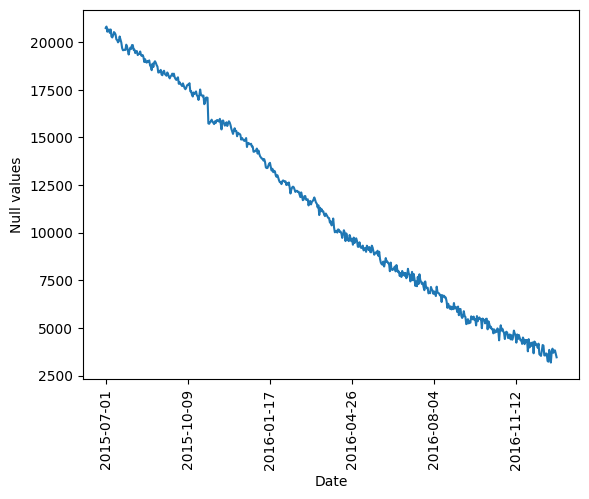

In [ ]:
# null values are showing a decreasing trend
raw_df.isna().sum()[1:].plot()  # without page
plt.xlabel('Date')
plt.ylabel('Null values')
plt.xticks(rotation=90)
plt.show()

Some website have all nan values for intial dates, maybe those pages were created later, hence nan values for all the dates before it was created.

In [ ]:
raw_df2=raw_df.dropna(how='all')
raw_df2.isna().sum()  # this removes all the rows with zero inputs; includes pages without name

,0
Page,0
2015-07-01,20740
2015-07-02,20816
2015-07-03,20544
2015-07-04,20654
...,...
2016-12-27,3701
2016-12-28,3822
2016-12-29,3826
2016-12-30,3635


In [ ]:
raw_df2=raw_df2.dropna(thresh=300)
raw_df2.isna().sum()  # removes any row, which have less frequent visitors, or recent webpage

,0
Page,0
2015-07-01,9666
2015-07-02,9683
2015-07-03,9442
2015-07-04,9561
...,...
2016-12-27,901
2016-12-28,943
2016-12-29,959
2016-12-30,941


In [ ]:
raw_df2=raw_df2.fillna(0).reset_index(drop=True)
raw_df2

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133612,Legión_(Marvel_Comics)_es.wikipedia.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,3.0,2.0,4.0,2.0,4.0,4.0,1.0,2.0,2.0
133613,Referéndum_sobre_la_permanencia_del_Reino_Unid...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,16.0,8.0,3.0,6.0,3.0,3.0,10.0,11.0,3.0
133614,Salida_del_Reino_Unido_de_la_Unión_Europea_es....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,36.0,23.0,182.0,43.0,8.0,22.0,13.0,18.0,14.0
133615,"Amar,_después_de_amar_es.wikipedia.org_all-acc...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,30.0,27.0,14.0,8.0,7.0,5.0,43.0,12.0,25.0


In [ ]:
import re

def split_page(page):
    words = re.split('_|\.', page)
    # print(words)
    return " ".join(words[:-5]), words[-5], words[-2], words[-1]

split_page('2NE1_zh.wikipedia.org_all-access_spider')

('2NE1', 'zh', 'all-access', 'spider')

In [ ]:
# multiple pages with views for corresponding days

page_detail = raw_df2.Page.apply(lambda x: split_page(str(x)))
page_detail

,Page
0,"(2NE1, zh, all-access, spider)"
1,"(2PM, zh, all-access, spider)"
2,"(3C, zh, all-access, spider)"
3,"(4minute, zh, all-access, spider)"
4,"(5566, zh, all-access, spider)"
...,...
133612,"(Legión (Marvel Comics), es, all-access, spider)"
133613,(Referéndum sobre la permanencia del Reino Uni...
133614,"(Salida del Reino Unido de la Unión Europea, e..."
133615,"(Amar, después de amar, es, all-access, spider)"


In [ ]:
li = list(page_detail)
df_page = pd.DataFrame(li)
df_page.columns = ['Title', 'Language', 'Access_type','Access_origin']
df_page = pd.concat([raw_df2, df_page], axis = 1)

In [ ]:
df_page.groupby('Language').count()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Access_type,Access_origin
Language,,,,,,,,,,,,,,,,,,,,,
commons,8266,8266,8266,8266,8266,8266,8266,8266,8266,8266,...,8266,8266,8266,8266,8266,8266,8266,8266,8266,8266
de,17362,17362,17362,17362,17362,17362,17362,17362,17362,17362,...,17362,17362,17362,17362,17362,17362,17362,17362,17362,17362
en,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486,...,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486
es,13551,13551,13551,13551,13551,13551,13551,13551,13551,13551,...,13551,13551,13551,13551,13551,13551,13551,13551,13551,13551
fr,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948,...,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948
ja,19295,19295,19295,19295,19295,19295,19295,19295,19295,19295,...,19295,19295,19295,19295,19295,19295,19295,19295,19295,19295
ru,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270,...,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270
www,6228,6228,6228,6228,6228,6228,6228,6228,6228,6228,...,6228,6228,6228,6228,6228,6228,6228,6228,6228,6228
zh,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211,...,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211


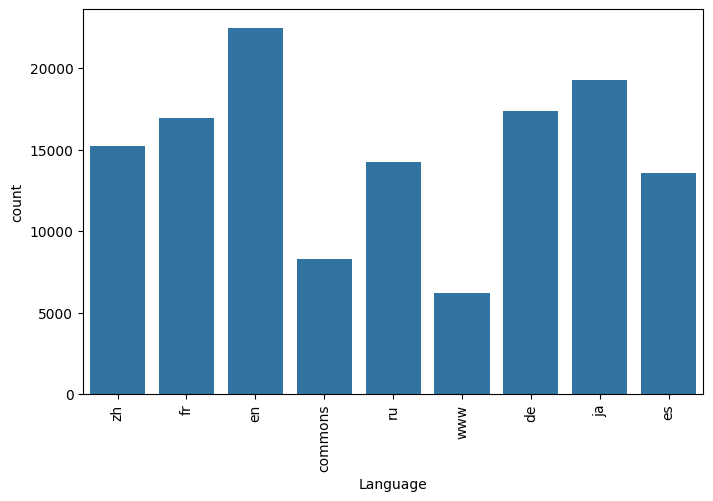

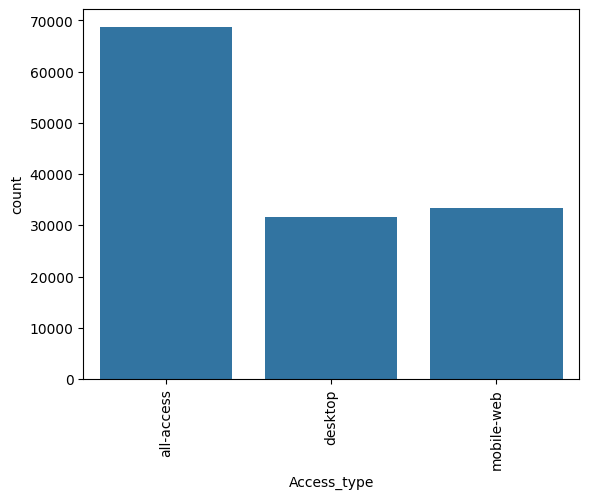

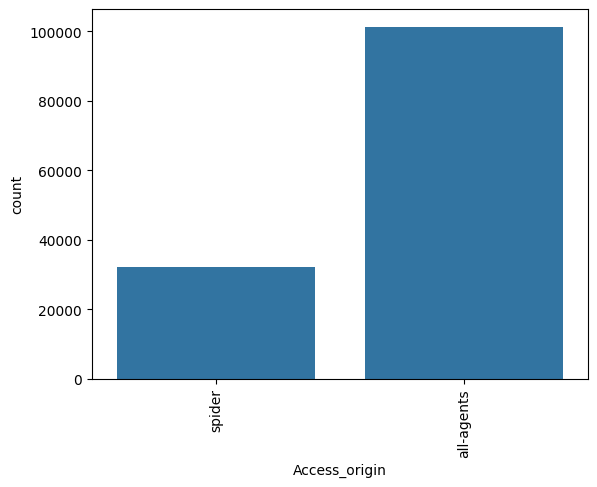

In [ ]:
plt.figure(figsize=(8,5))
for x in df_page.columns[-3:]:
  sns.countplot(df_page, x=x)
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
df_page[df_page['Language']=='commons'].Page

,Page
12271,Accueil_commons.wikimedia.org_all-access_spider
12272,Atlas_of_Asia_commons.wikimedia.org_all-access...
12273,Atlas_of_Europe_commons.wikimedia.org_all-acce...
12274,Atlas_of_World_War_II_commons.wikimedia.org_al...
12275,Atlas_of_colonialism_commons.wikimedia.org_all...
...,...
75274,"File:El_jardín_de_las_Delicias,_de_El_Bosco.jp..."
75275,File:Jää_on_kulmunud_pallideks_(Looduse_veidru...
75276,File:Reichstagsgebäude_mit_Weihnachtsbaum_bei_...
75277,Category:Images_by_Eugène_Cattin_commons.wikim...


In [ ]:
df_page[df_page['Language']=='www'].Page
# df[df['Language']=='www'].Title

,Page
17850,API_www.mediawiki.org_all-access_all-agents
17851,API:Account_creation_www.mediawiki.org_all-acc...
17852,API:Allimages_www.mediawiki.org_all-access_all...
17853,API:Allpages_www.mediawiki.org_all-access_all-...
17854,API:Backlinks_www.mediawiki.org_all-access_all...
...,...
76772,help:contents_www.mediawiki.org_all-access_spider
76773,how_to_contribute_www.mediawiki.org_all-access...
76774,mediawiki_www.mediawiki.org_all-access_spider
76775,special:book_www.mediawiki.org_all-access_spider


In [ ]:
# replace commons and www as no language
df_page['Language'] = df_page['Language'].replace(['www', 'commons'], 'NA')
df_page['Language'].value_counts()

,count
Language,
en,22486
ja,19295
de,17362
fr,16948
zh,15211
NA,14494
ru,14270
es,13551


In [ ]:
df_page.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
       '2016-12-31', 'Title', 'Language', 'Access_type', 'Access_origin'],
      dtype='object', length=555)

In [ ]:
df_page = df_page.drop(columns=["Page", 'Title', 'Access_type', 'Access_origin'])

In [ ]:
# since our forecasting will be on language level, and not individual page, we can group them on language
df_ts=df_page.groupby('Language').mean().transpose()

In [ ]:
df_ts = df_ts.reset_index()
df_ts.set_index('index', inplace=True)

In [ ]:
df_ts.columns

Index(['NA', 'de', 'en', 'es', 'fr', 'ja', 'ru', 'zh'], dtype='object', name='Language')

In [ ]:
df_ts.index

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', name='index', length=550)

In [ ]:
# columns = ['name', 'source', 'acces', 'agent']
# dictionary = {
#     'name': [' '.join(row[:-3]) for row in page_detail],
#     'source': [row[-3] for row in page_detail],
#     'acces': [row[-2] for row in page_detail],
#     'agent': [row[-1] for row in page_detail]
# }
# df_page = pd.DataFrame(dictionary)
# df_page

In [ ]:
# sns.countplot(df_page, x='acces')

In [ ]:
# sns.countplot(df_page, x='source')
# plt.xticks(rotation=90)

In [ ]:
# sns.countplot(df_page, x='agent')
# plt.xticks(rotation=90)

In [ ]:
# for x in df_page.columns[1:]:
#   sns.countplot(df_page, x=x)
#   plt.xticks(rotation=90)
#   plt.show()

In [ ]:
# row1 = raw_df.iloc[0, 1:-1].reset_index()  # all date values for first row
# row1

In [ ]:
# row1.columns

Index(['index', 0], dtype='object')

In [ ]:
# sns.lineplot(row1, x="index", y=0)
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
# row1 = raw_df.iloc[1, 1:-1].reset_index()
# row1

In [ ]:
# for row in range(5):
#   row1 = raw_df.iloc[row, 1:-1].reset_index()  # all date values for first row
#   sns.lineplot(row1, x="index", y=row)
#   plt.xticks(rotation=90)
#   plt.show()

In [ ]:
# for row in range(14000, 14005):
#   row1 = raw_df.iloc[row, 1:-1].reset_index()
#   sns.lineplot(row1, x="index", y=row)
#   plt.xticks(rotation=90)
#   plt.show()

In [ ]:
df_ts.index = pd.to_datetime(df_ts.index, format='ISO8601', dayfirst=True)
df_ts

Language,NA,de,en,es,fr,ja,ru,zh
index,,,,,,,,
2015-07-01,102.733545,763.765926,3767.328604,1127.485204,499.092872,614.637160,663.199229,272.498521
2015-07-02,107.663447,753.362861,3755.158765,1077.485425,502.297852,705.813216,674.677015,272.906778
2015-07-03,101.769629,723.074415,3565.225696,990.895949,483.007553,637.451671,625.329783,271.097167
2015-07-04,86.853871,663.537323,3711.782932,930.303151,516.275785,800.897435,588.171829,273.712379
2015-07-05,96.254105,771.358657,3833.433025,1011.759575,506.871666,768.352319,626.385354,291.977713
...,...,...,...,...,...,...,...,...
2016-12-27,155.270181,1119.596936,6314.335275,1070.923400,840.590217,808.541436,998.374071,363.066991
2016-12-28,178.561267,1062.284069,6108.874144,1108.996753,783.585379,807.430163,945.054730,369.049701
2016-12-29,150.873534,1033.939062,6518.058525,1058.660320,763.209169,883.752786,909.352207,340.526330


In [ ]:
# df_ts.to_csv("prep_ts.csv")
df_ts = pd.read_csv("prep_ts.csv", index_col='index')
df_ts

,NA,de,en,es,fr,ja,ru,zh
index,,,,,,,,
01-07-2015,102.733545,763.765926,3767.328604,1127.485204,499.092872,614.637160,663.199229,272.498521
02-07-2015,107.663447,753.362861,3755.158765,1077.485425,502.297852,705.813216,674.677015,272.906778
03-07-2015,101.769629,723.074415,3565.225696,990.895949,483.007552,637.451671,625.329783,271.097167
04-07-2015,86.853871,663.537323,3711.782932,930.303151,516.275785,800.897435,588.171829,273.712379
05-07-2015,96.254105,771.358657,3833.433025,1011.759575,506.871666,768.352319,626.385354,291.977713
...,...,...,...,...,...,...,...,...
27-12-2016,155.270181,1119.596936,6314.335275,1070.923400,840.590217,808.541436,998.374072,363.066991
28-12-2016,178.561267,1062.284069,6108.874144,1108.996753,783.585379,807.430163,945.054730,369.049701
29-12-2016,150.873534,1033.939062,6518.058525,1058.660320,763.209169,883.752786,909.352207,340.526330


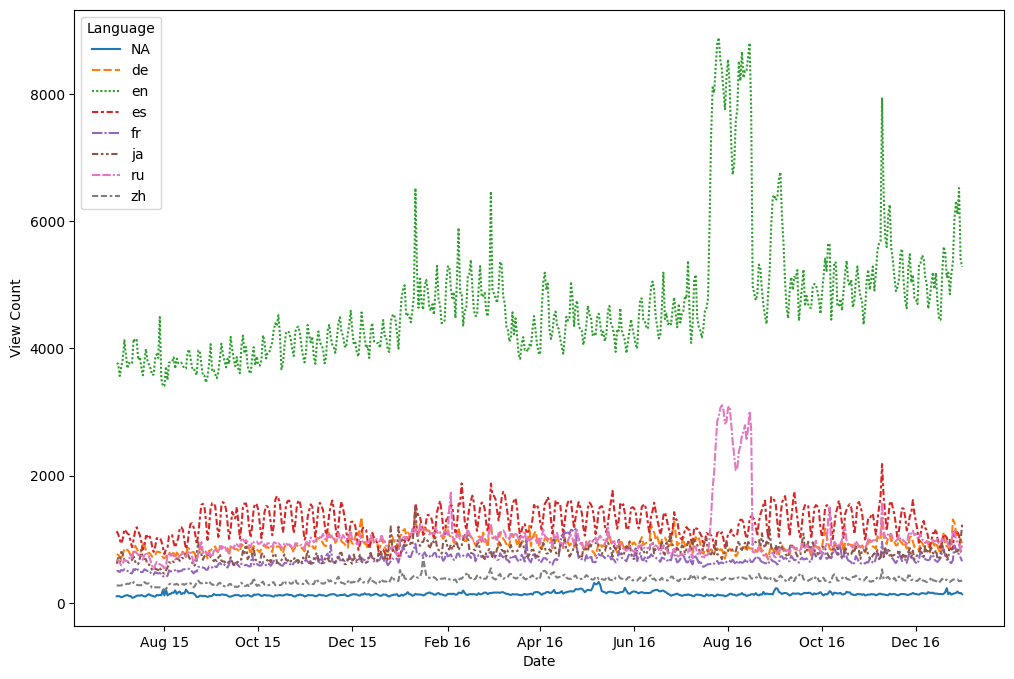

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12,8))
sns.lineplot(df_ts)
plt.ylabel("View Count")
plt.xlabel('Date')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.show()

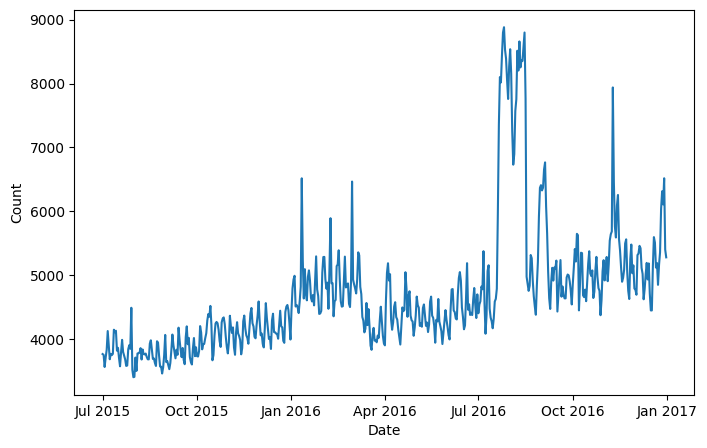

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(df_ts['en'])
plt.ylabel("Count")
plt.xlabel('Date')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.show()

## Check Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(x):
    result=adfuller(x)
    print(f'ADF Stastistic: {result[0]}')
    print(f'p-value: {result[1]}')

adf_test(df_ts['en'])

ADF Stastistic: -2.373562974678148
p-value: 0.1493374943418695


current timeseries is not stationary,
we need to do differencing or decompose the timeseries

### Decomposition

In [ ]:
en_ts = df_ts['en']
# en_ts.info()

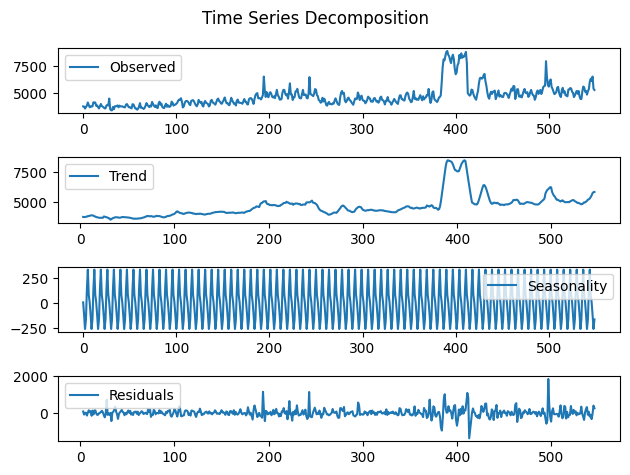

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(en_ts.values, model='additive', period = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, axs = plt.subplots(4, 1)
plt.suptitle('Time Series Decomposition')
axs[0].plot(en_ts.values,label='Observed')
axs[0].legend()
axs[1].plot(trend, label='Trend')
axs[1].legend()
axs[2].plot(seasonal,label='Seasonality')
axs[2].legend()
axs[3].plot(residual, label='Residuals')
axs[3].legend()
plt.tight_layout()
plt.show()

In [ ]:
# check stationarity on residuals, i.e after removing trend and seasonality
ts_resid_add=pd.DataFrame(residual).fillna(0)[0].values
adf_test(ts_resid_add)

ADF Stastistic: -11.521953006452447
p-value: 4.020092423588474e-21


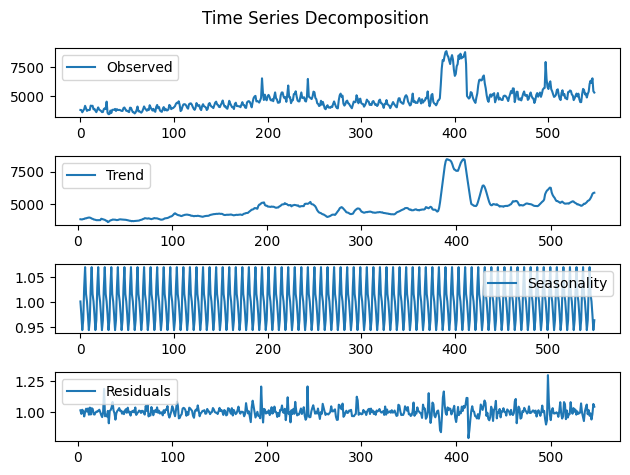

In [ ]:
decomposition = seasonal_decompose(en_ts.values, model='multiplicative', period = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, axs = plt.subplots(4, 1)
plt.suptitle('Time Series Decomposition')
axs[0].plot(en_ts.values,label='Observed')
axs[0].legend()
axs[1].plot(trend, label='Trend')
axs[1].legend()
axs[2].plot(seasonal,label='Seasonality')
axs[2].legend()
axs[3].plot(residual, label='Residuals')
axs[3].legend()
plt.tight_layout()
plt.show()

In [ ]:
ts_resid_multi=pd.DataFrame(residual).fillna(0)[0].values
adf_test(ts_resid_multi)

ADF Stastistic: -3.7963199380429353
p-value: 0.0029451920571994267


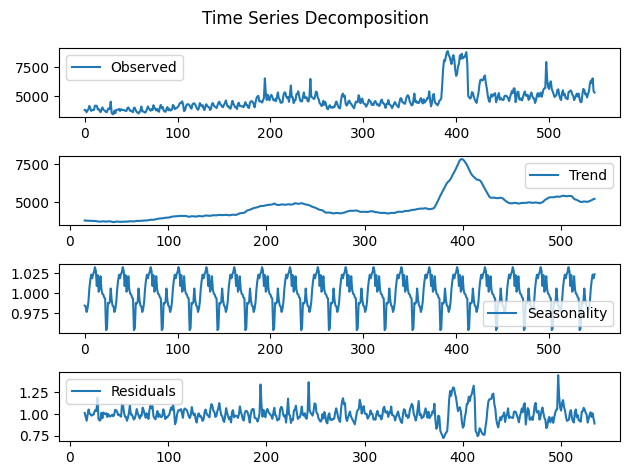

In [ ]:
decomposition = seasonal_decompose(en_ts.values, model='multiplicative', period = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, axs = plt.subplots(4, 1)
plt.suptitle('Time Series Decomposition')
axs[0].plot(en_ts.values,label='Observed')
axs[0].legend()
axs[1].plot(trend, label='Trend')
axs[1].legend()
axs[2].plot(seasonal,label='Seasonality')
axs[2].legend()
axs[3].plot(residual, label='Residuals')
axs[3].legend()
plt.tight_layout()
plt.show()

In [ ]:
# check stationarity on residuals, i.e after removing trend and seasonality
ts_resid_multi_30=pd.DataFrame(residual).fillna(0)[0].values
adf_test(ts_resid_multi_30)

ADF Stastistic: -4.398290855638004
p-value: 0.0002989068221169849


additive and multiplicative have almost similar graphs (different values, due to different calc/formula)
with period/frequency 7 (weekly season) better caputures trend in the series

### Differencing

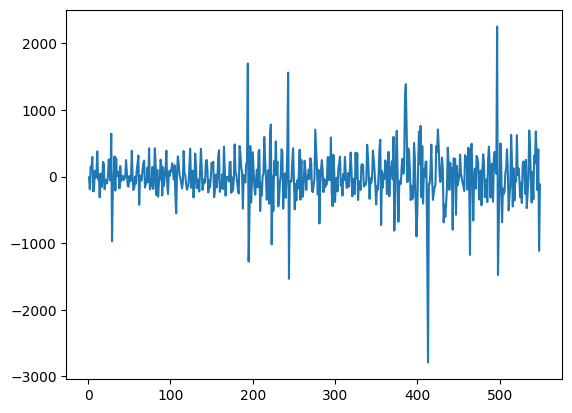

In [ ]:
en_ts
en_ts_diff = en_ts - en_ts.shift(1)
plt.plot(en_ts_diff.values)
plt.show()

In [ ]:
adf_test(en_ts_diff[1:])  # remove first nan value, created after using diff

ADF Stastistic: -8.273590058451267
p-value: 4.721271967614165e-13


## ACF and PACF plots



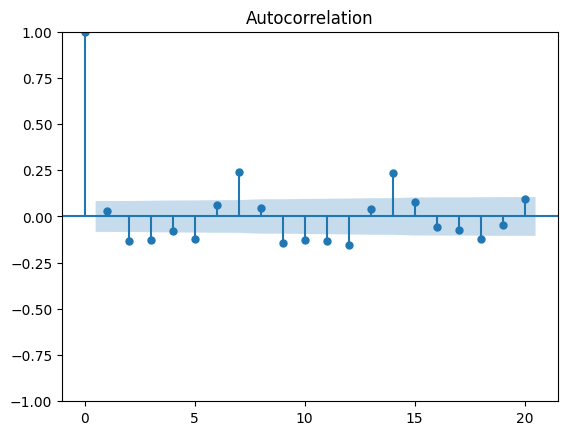

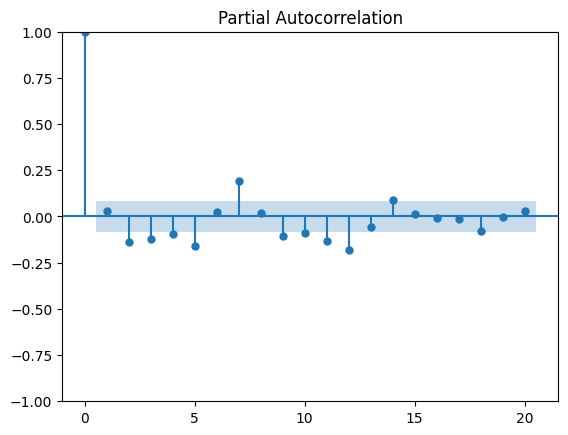

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf=plot_acf(en_ts_diff[1:],lags=20)
pacf=plot_pacf(en_ts_diff[1:],lags=20)

we use PACF for p, here we see that till lag 5 there are significat lines
we use ACF for q. here we can see that till lag 3 there are significat lines

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(en_ts.values, model='additive', period = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

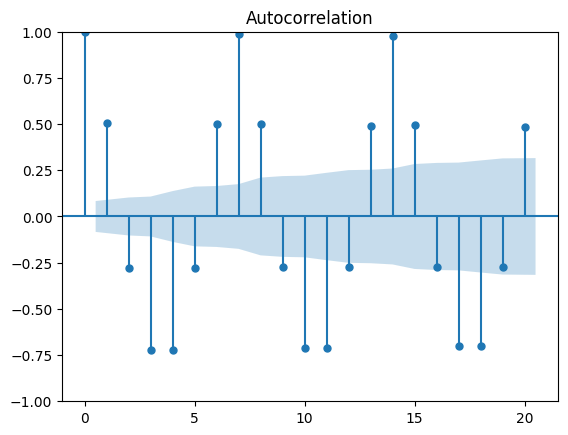

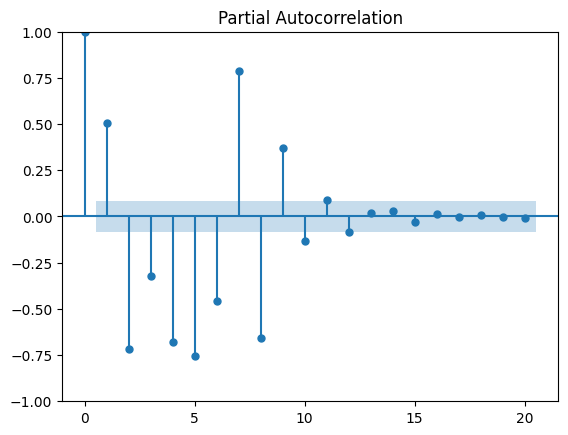

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf=plot_acf(seasonal,lags=20)
pacf=plot_pacf(seasonal,lags=20)

## Arima

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas import DataFrame

In [ ]:
# model = ARIMA(en_ts, order=(4,1,7))
model = SARIMAX(en_ts, order=(4, 1, 7))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


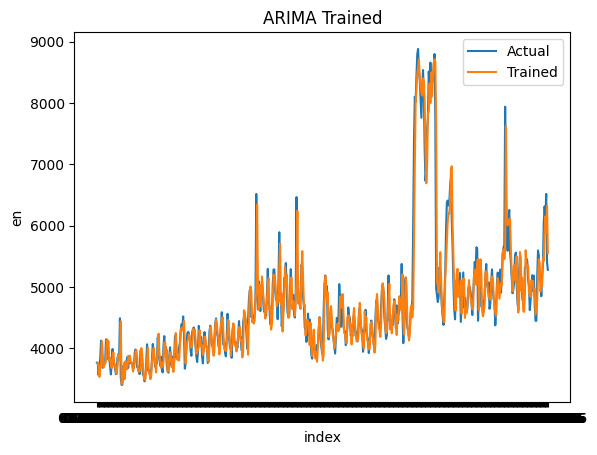

In [ ]:
pred = model_fit.predict(dynamic=False)

sns.lineplot(en_ts, label='Actual')  # en_ts is the original time series
sns.lineplot(pred[1:], label='Trained')  # remove the zeroth pred, zero/nan due to diff(1)
plt.legend()
plt.title('ARIMA Trained')
plt.show()

In [ ]:
from sklearn.metrics import (mean_squared_error as mse,
                             mean_absolute_percentage_error as mape)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('RMSE :', round(mse(actual, predicted)**0.5, 2))
    print('MAPE:', round(mape(actual, predicted), 4))

In [ ]:
# performance(en_ts[1:], pred[1:])

In [ ]:
train = en_ts[:-20]
test = en_ts[-20:]

model = SARIMAX(train, order=(4,1,3))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


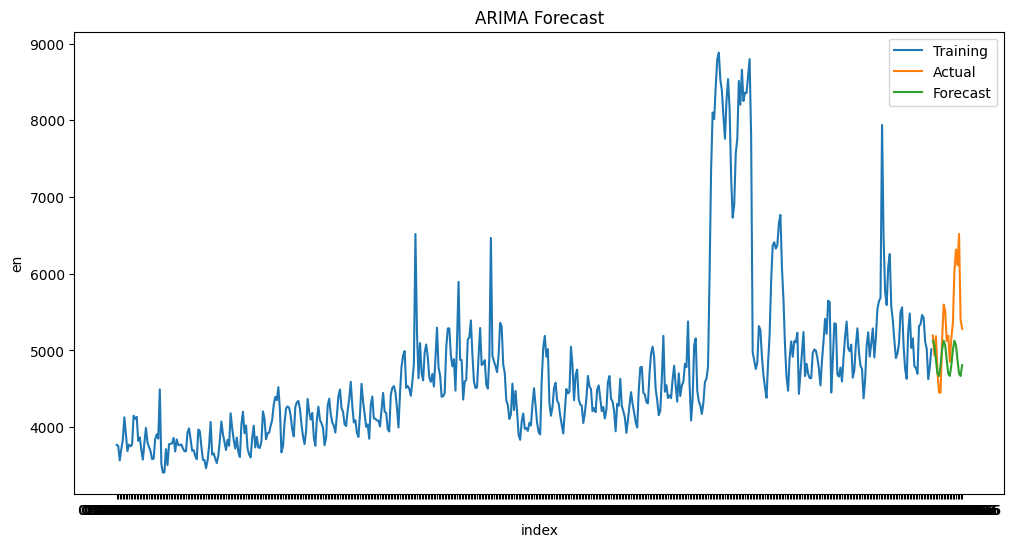

In [ ]:
fc_obj = model_fit.get_forecast(20, alpha=0.02)
fc = fc_obj.predicted_mean
fc_series = pd.Series(fc.values, index=test.index)

plt.figure(figsize=(12,6))
sns.lineplot(train, label='Training')
sns.lineplot(test, label='Actual')
sns.lineplot(fc_series, label='Forecast')

plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [ ]:
performance(test, fc_series)

RMSE : 682.68
MAPE: 0.0897


## SARIMAX
### Exog Variable

In [ ]:
exog_df = pd.read_csv('Exog_Campaign_eng')
exog_df.index = en_ts.index
exog_df.head(4)

,Exog
index,
01-07-2015,0
02-07-2015,0
03-07-2015,0
04-07-2015,0


In [ ]:
en_ts_df = en_ts.to_frame(name='en')
# en_ts_df
type(en_ts_df), type(exog_df)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [ ]:
train = en_ts_df[:520].copy()
test = en_ts_df[520:].copy()

model = SARIMAX(train, order=(4,1,3), seasonal_order=(3,0,2,7), exog=exog_df.loc[train.index])
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Like

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


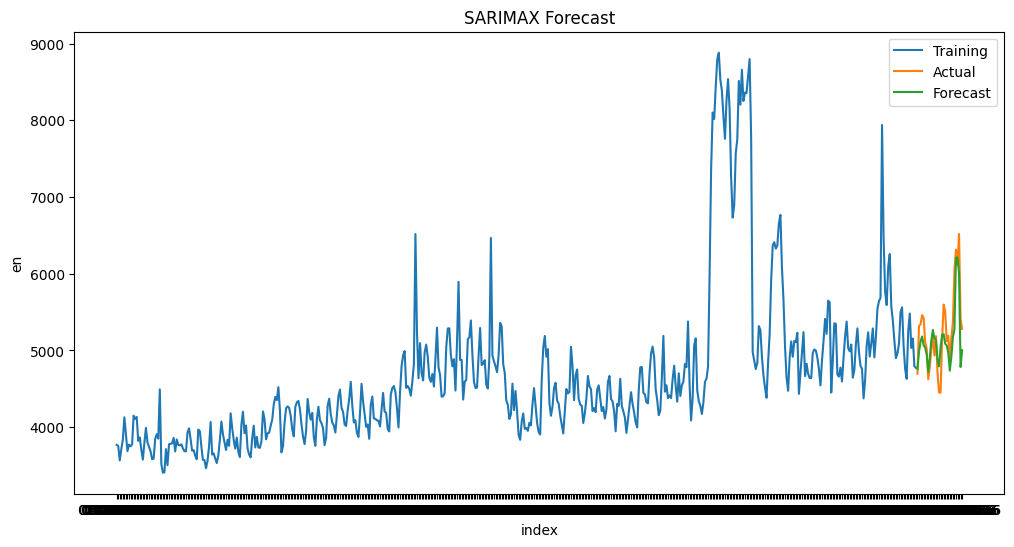

RMSE : 304.71
MAPE: 0.0456


In [ ]:
fc_obj = model_fit.get_forecast(30, exog=exog_df.loc[test.index])
fc = fc_obj.predicted_mean
fc_series = pd.Series(fc.values, index=test.index)

plt.figure(figsize=(12,6))
sns.lineplot(train['en'], label='Training')
sns.lineplot(test['en'], label='Actual')
sns.lineplot(fc_series, label='Forecast')

plt.title('SARIMAX Forecast')
plt.legend()
plt.show()
performance(test, fc_series)

### Hyperparameter Tuning

In [ ]:
# !pip install pmdarima
# !pip install numpy --upgrade
!pip install numpy==1.26

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 49.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.


In [ ]:
# !numpy --version
# import numpy as np
# np.__version__

'1.26.0'

In [ ]:
from pmdarima.arima import auto_arima

model = auto_arima(en_ts,
                  seasonal=True, m=7,
                  start_p=0, max_p=4,
                  start_q=0, max_q=3,
                  start_P=0, max_P=7,
                  start_Q=0, max_Q=7,
                  max_d=1, max_D=1,
                  stepwise=True,
                  suppress_warnings=True,
                  information_criterion='aic')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  550
Model:             SARIMAX(0, 1, 0)x(3, 0, [1], 7)   Log Likelihood               -3955.273
Date:                             Wed, 18 Jun 2025   AIC                           7920.547
Time:                                     12:21:09   BIC                           7942.087
Sample:                                          0   HQIC                          7928.965
                                             - 550                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9461      0.062     15.142      0.000       0.824       1.069
ar.S.L14      -0.0038      0.050     -0.076      0.940      -0.103       0.095
ar.S.L21       0.0511      0.035      1.445      0.149      -0.018       0.120
ma.S.L7       -0.9312      0.027    -34.425      0.000      -0.984      -0.878
sigma2      1.042e+05   2140.361     48.697      0.000       1e+05    1.08e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.21   Jarque-Bera (JB):              7576.04
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               7.23   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df_ts

,NA,de,en,es,fr,ja,ru,zh
index,,,,,,,,
01-07-2015,102.733545,763.765926,3767.328604,1127.485204,499.092872,614.637160,663.199229,272.498521
02-07-2015,107.663447,753.362861,3755.158765,1077.485425,502.297852,705.813216,674.677015,272.906778
03-07-2015,101.769629,723.074415,3565.225696,990.895949,483.007552,637.451671,625.329783,271.097167
04-07-2015,86.853871,663.537323,3711.782932,930.303151,516.275785,800.897435,588.171829,273.712379
05-07-2015,96.254105,771.358657,3833.433025,1011.759575,506.871666,768.352319,626.385354,291.977713
...,...,...,...,...,...,...,...,...
27-12-2016,155.270181,1119.596936,6314.335275,1070.923400,840.590217,808.541436,998.374072,363.066991
28-12-2016,178.561267,1062.284069,6108.874144,1108.996753,783.585379,807.430163,945.054730,369.049701
29-12-2016,150.873534,1033.939062,6518.058525,1058.660320,763.209169,883.752786,909.352207,340.526330


In [ ]:
# def sarimax_models(lang_series, exog_df=None)

train = en_ts_df[:520].copy()
test = en_ts_df[520:].copy()

model = SARIMAX(train, order=(0,1,0), seasonal_order=(3,0,1,7), exog=exog_df.loc[train.index])
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


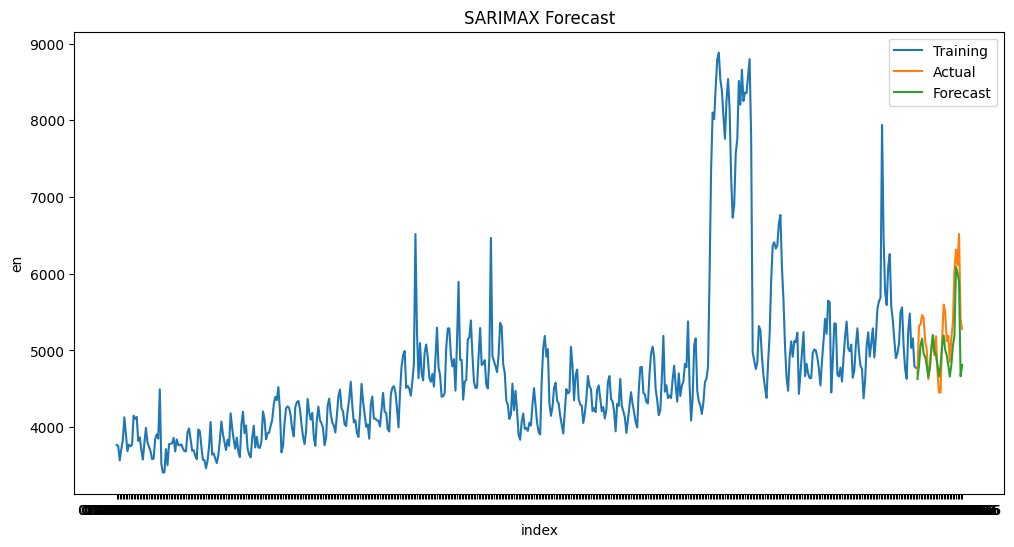

RMSE : 354.27
MAPE: 0.0523


In [ ]:
fc_obj = model_fit.get_forecast(30, exog=exog_df.loc[test.index])
fc = fc_obj.predicted_mean
fc_series = pd.Series(fc.values, index=test.index)

plt.figure(figsize=(12,6))
sns.lineplot(train['en'], label='Training')
sns.lineplot(test['en'], label='Actual')
sns.lineplot(fc_series, label='Forecast')

plt.title('SARIMAX Forecast')
plt.legend()
plt.show()
performance(test, fc_series)

performed poor

### Grid search

In [ ]:
import warnings
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

def grid_search_sarima(ts):
    p_vals, d_vals, q_vals = [1,2,3,4], [1], [1,2,3]  # [1,2,3,4], [1], [1,2,3]
    P_vals, D_vals, Q_vals = [1], [0,1], [1]  # [1,2,3,4,5], [1], [1,2,3,4]
    seasonal_period = 7

    # Generate all permutations
    orders = list(product(p_vals, d_vals, q_vals))
    seasonal_orders = list(product(P_vals, D_vals, Q_vals))

    best_mape = 100  # max percentage
    best_order = None
    best_seasonal_order = None
#     return orders, seasonal_orders

# orders, seasonal_orders = grid_search_sarima()
# print(orders)
# print(seasonal_orders)

    # Grid search over all combinations
    for order in orders:
        for seasonal in seasonal_orders:
            seasonal_order = (*seasonal, seasonal_period)
            # print(order, seasonal_order)
            try:
                with warnings.catch_warnings():
                    warnings.filterwarnings("ignore")

                    model = SARIMAX(ts[:520],
                                    order=order,
                                    seasonal_order=seasonal_order,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
                    results = model.fit()

                    fc= results.forecast(30)
                    mape = mean_absolute_percentage_error(ts[520:], fc)

                    if mape < best_mape:
                        best_mape = mape
                        best_order = order
                        best_seasonal_order = seasonal_order

            except Exception as e:
                continue

    print(f"Best order, Seasonal order: {best_order},{best_seasonal_order}")
    print(f"Best MAPE: {best_mape:.4f}")
    return best_order, best_seasonal_order

# best_order, best_seasonal_order = grid_search_sarima(en_ts)

In [ ]:
def predict_lang_view(ts, order, seasonal_order):
  model = SARIMAX(ts[:520],order=order,seasonal_order=seasonal_order,
                  enforce_stationarity=False, enforce_invertibility=False)
  results = model.fit()

  fc = results.forecast(30)
  # fc = fc_obj.predicted_mean
  fc_series = pd.Series(fc.values, index=test.index)

  plt.figure(figsize=(12,6))
  sns.lineplot(ts[:520], label='Training')
  sns.lineplot(ts[520:], label='Actual')
  sns.lineplot(fc, label='Forecast')

  plt.title('SARIMAX Forecast')
  plt.legend()
  plt.show()

# predict_lang_view(df_ts['NA'], (2,1,1), (1,1,1,7))

In [ ]:
df_ts.index = pd.to_datetime(df_ts.index, dayfirst=True)
df_ts.index

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='index', length=550, freq=None)

used minimal values in grid search, wont necessarily, be fit for all

Language Forecast: ['NA']
Best order, Seasonal order: (4, 1, 2),(1, 1, 1, 7)
Best MAPE: 0.0875


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


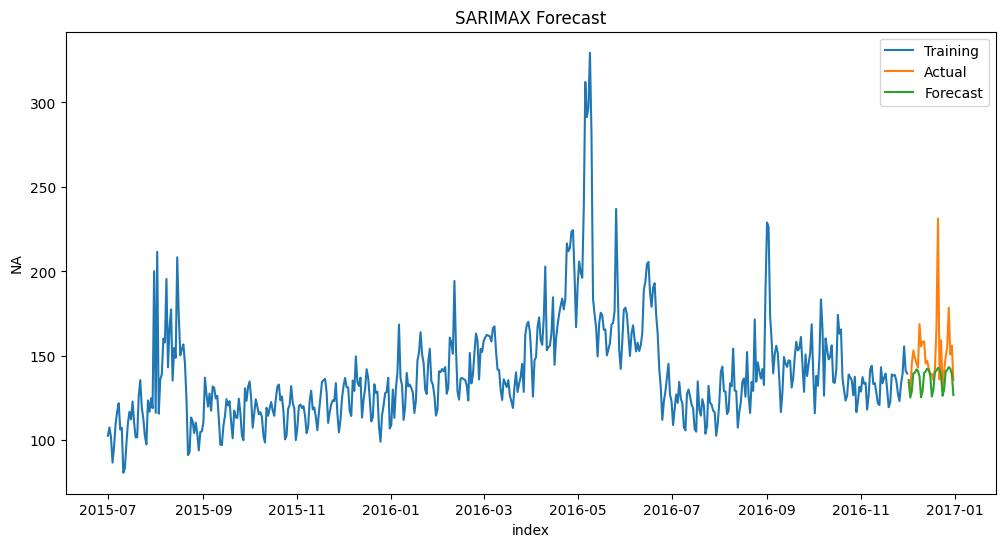

Language Forecast: ['de']
Best order, Seasonal order: (4, 1, 2),(1, 1, 1, 7)
Best MAPE: 0.0698


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


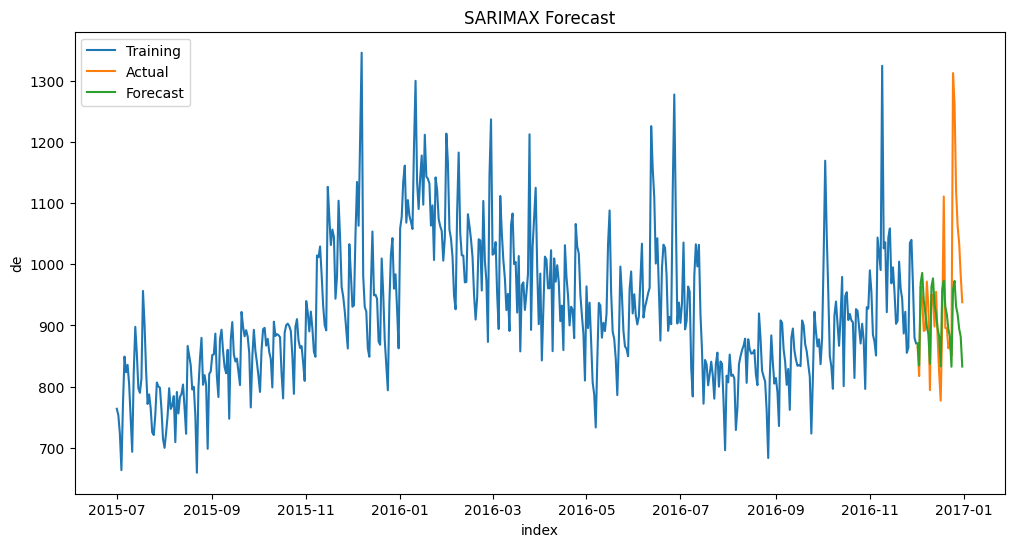

Language Forecast: ['es']
Best order, Seasonal order: (1, 1, 1),(1, 0, 1, 7)
Best MAPE: 0.1945


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


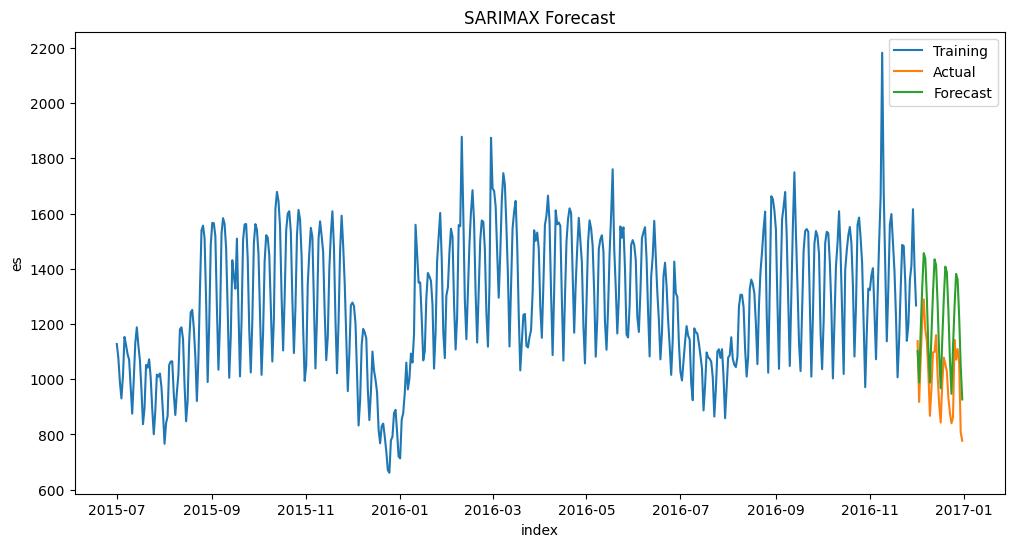

Language Forecast: ['fr']
Best order, Seasonal order: (1, 1, 1),(1, 1, 1, 7)
Best MAPE: 0.0612


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


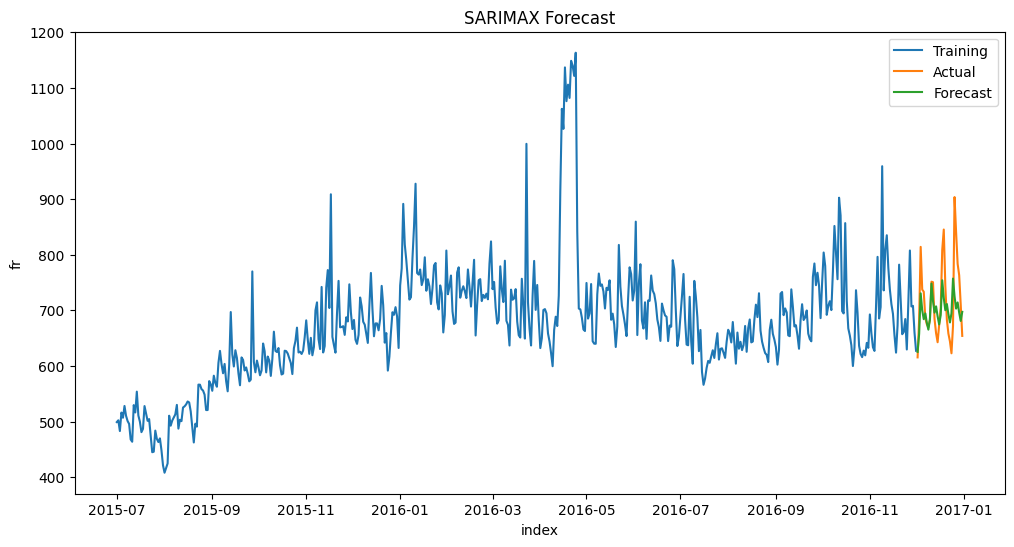

Language Forecast: ['ja']
Best order, Seasonal order: (1, 1, 3),(1, 0, 1, 7)
Best MAPE: 0.0795


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


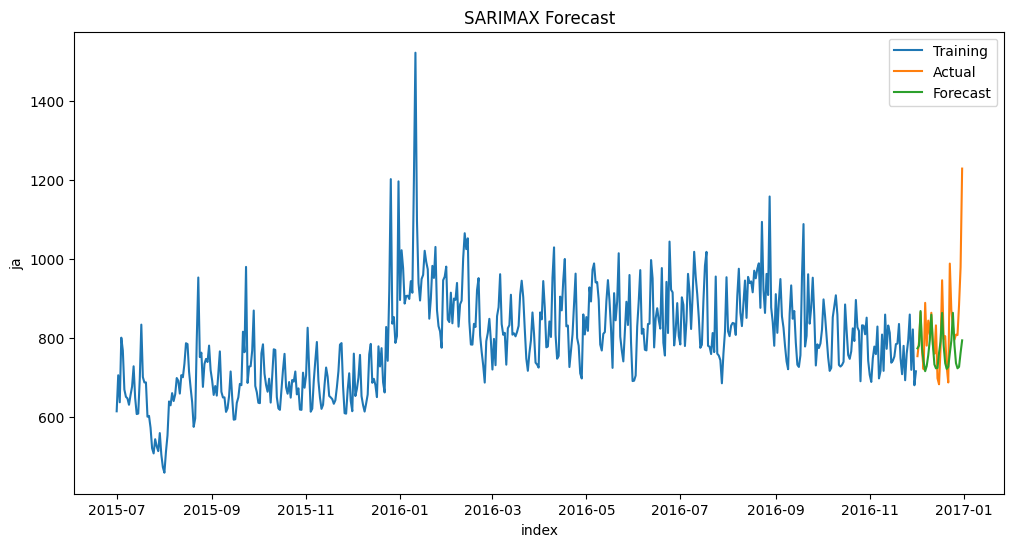

Language Forecast: ['ru']
Best order, Seasonal order: (4, 1, 3),(1, 0, 1, 7)
Best MAPE: 0.0981


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


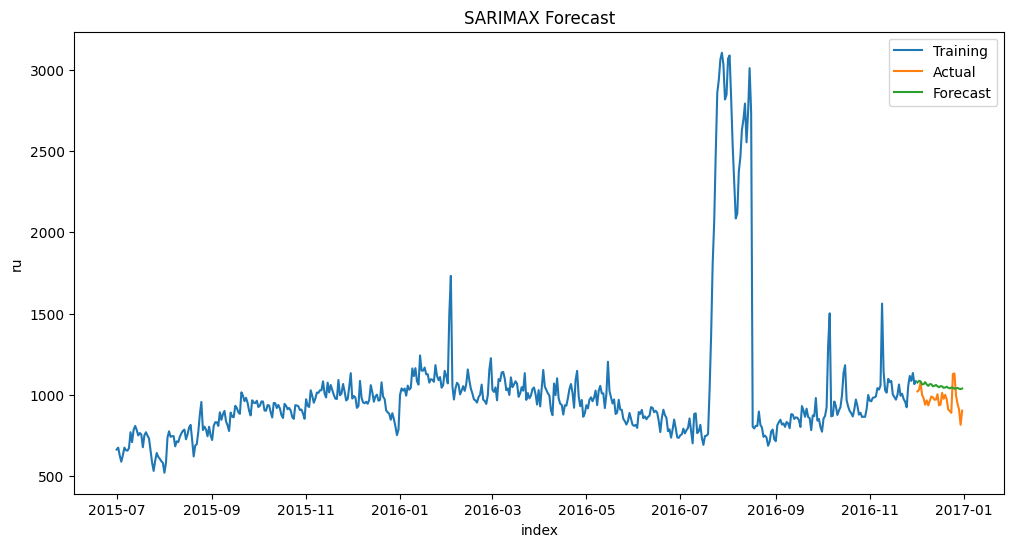

Language Forecast: ['zh']
Best order, Seasonal order: (4, 1, 3),(1, 0, 1, 7)
Best MAPE: 0.0691


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


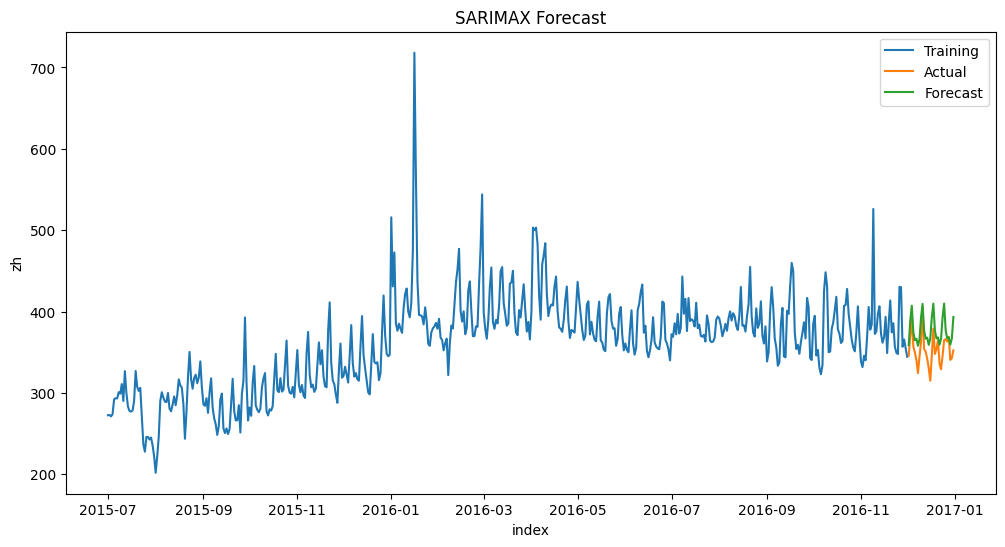

In [ ]:
# df_ts.columns
# df_ts = df_ts.drop(columns=['en'])
for i, col in enumerate(df_ts.columns):
  print(f"Language Forecast: {[col]}")
  # print(df_ts[col].head(3))

  best_order, best_seasonal_order = grid_search_sarima(df_ts[col])

  predict_lang_view(df_ts[col], best_order, best_seasonal_order)

## Facebook Prophet

In [ ]:
# !pip install pystan
!pip install prophet

In [ ]:
df_prophet = en_ts_df.copy()
df_prophet = df_prophet.reset_index()
df_prophet.columns = ['ds', 'y']

In [ ]:
df_prophet

,ds,y
0,01-07-2015,3767.328604
1,02-07-2015,3755.158765
2,03-07-2015,3565.225696
3,04-07-2015,3711.782932
4,05-07-2015,3833.433025
...,...,...
545,27-12-2016,6314.335275
546,28-12-2016,6108.874144
547,29-12-2016,6518.058525
548,30-12-2016,5401.792360


In [ ]:
df_prophet.ds = pd.to_datetime(df_prophet['ds'], dayfirst=True)
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      550 non-null    datetime64[ns]
 1   y       550 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjd0g3g55/t01eaex1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjd0g3g55/nbg2rj1g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3558', 'data', 'file=/tmp/tmpjd0g3g55/t01eaex1.json', 'init=/tmp/tmpjd0g3g55/nbg2rj1g.json', 'output', 'file=/tmp/tmpjd0g3g55/prophet_modelnar8bty1/prophet_model-20250617175622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


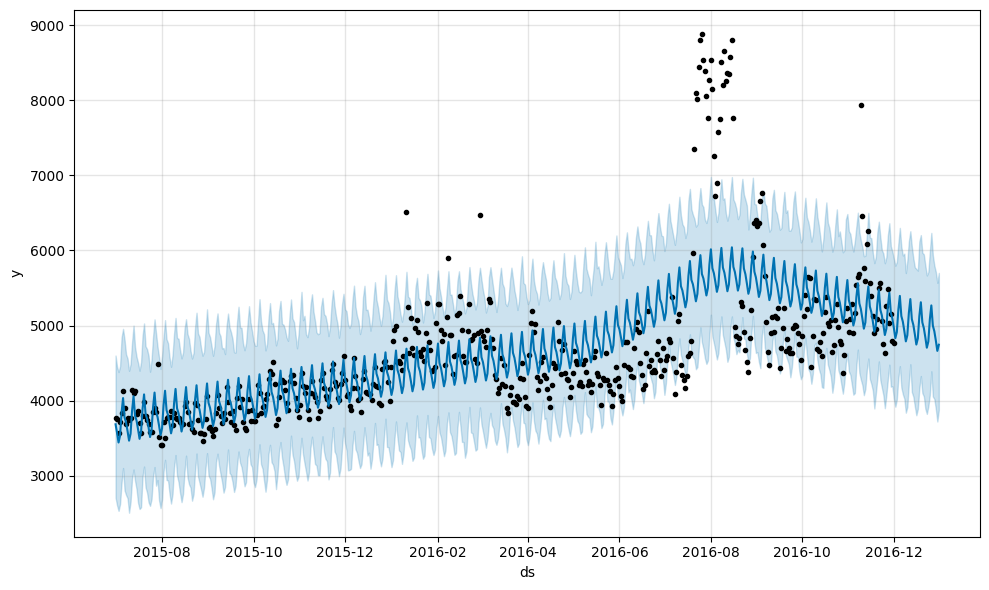

In [ ]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet[:520])

# Create future dataframe
future = model.make_future_dataframe(periods=len(df_prophet[520:]), freq='D')

forecast = model.predict(future)
fig = model.plot(forecast)
performance(df_prophet['y'][520:], forecast['yhat'][520:])

In [ ]:
forecast[545:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
545,2016-12-27,4932.292982,4055.365275,5937.718343,4908.625409,4957.986879,67.689377,67.689377,67.689377,67.689377,67.689377,67.689377,0.0,0.0,0.0,4999.982359
546,2016-12-28,4926.261990,4022.695522,5799.861584,4901.250081,4954.292845,-1.914965,-1.914965,-1.914965,-1.914965,-1.914965,-1.914965,0.0,0.0,0.0,4924.347025
547,2016-12-29,4920.230998,3888.464773,5715.195030,4893.798644,4950.003434,-120.004024,-120.004024,-120.004024,-120.004024,-120.004024,-120.004024,0.0,0.0,0.0,4800.226974
548,2016-12-30,4914.200006,3723.017728,5569.253910,4886.001599,4946.206324,-251.226214,-251.226214,-251.226214,-251.226214,-251.226214,-251.226214,0.0,0.0,0.0,4662.973792
549,2016-12-31,4908.169014,3876.521819,5700.863615,4878.826764,4941.801546,-163.111910,-163.111910,-163.111910,-163.111910,-163.111910,-163.111910,0.0,0.0,0.0,4745.057105


In [ ]:
performance(df_prophet['y'][520:], forecast['yhat'][520:])

RMSE : 544.49
MAPE: 0.0672


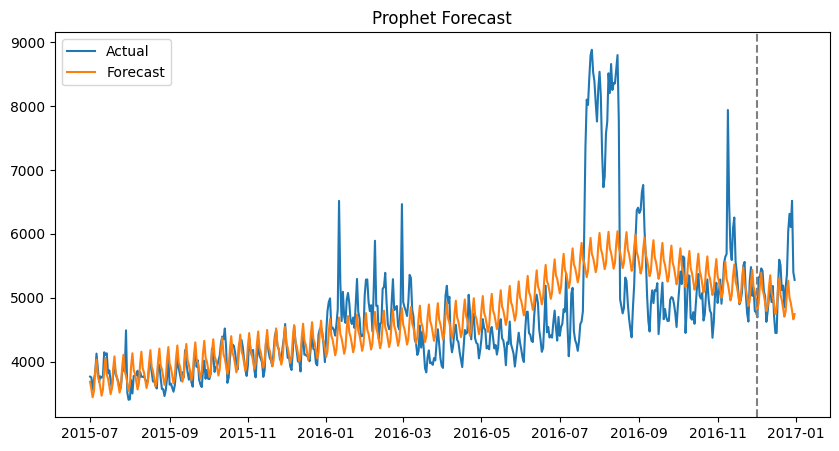

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.axvline(df_prophet['ds'].iloc[520], color='gray', linestyle='--')  # split marker
plt.legend()
plt.title('Prophet Forecast')
plt.show()

In [ ]:
exog_df = exog_df.reset_index()
exog_df.columns = ['ds', 'Exog']
exog_df.ds = pd.to_datetime(exog_df['ds'], dayfirst=True)

In [ ]:
df_prophet_ex = pd.merge(df_prophet, exog_df, on='ds')
df_prophet_ex.info()
# df_prophet_ex.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      550 non-null    datetime64[ns]
 1   y       550 non-null    float64       
 2   Exog    550 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 13.0 KB


In [ ]:
# with exog variable
model = Prophet()
model.add_regressor('Exog')  # register exogenous variable
model.fit(df_prophet_ex[:520])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjd0g3g55/w8ea3wvf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjd0g3g55/do41r6un.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11216', 'data', 'file=/tmp/tmpjd0g3g55/w8ea3wvf.json', 'init=/tmp/tmpjd0g3g55/do41r6un.json', 'output', 'file=/tmp/tmpjd0g3g55/prophet_modeleom9kset/prophet_model-20250617181643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:16:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:16:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


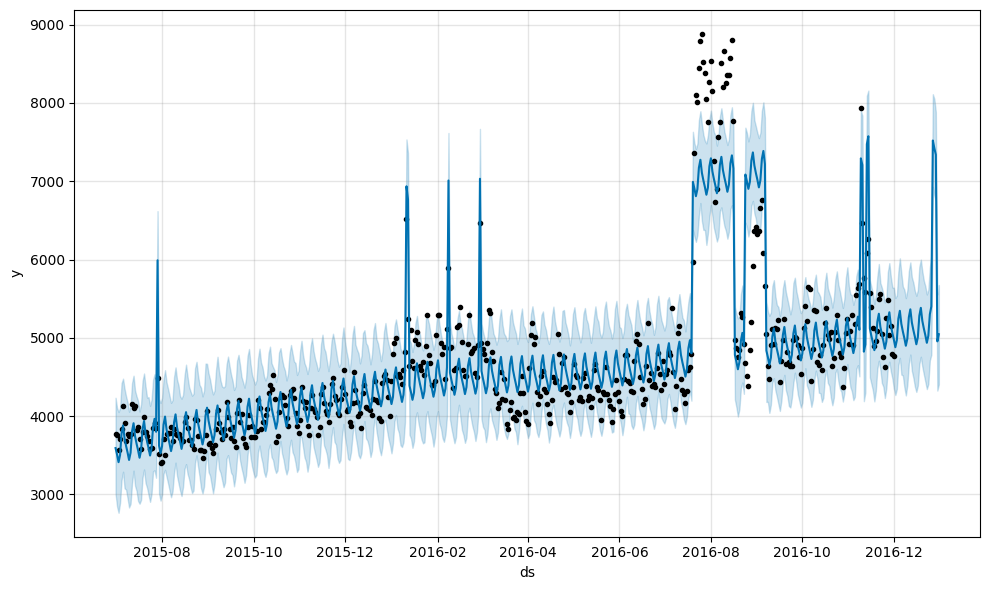

In [ ]:
future = pd.concat([df_prophet_ex[:511], df_prophet_ex[511:]])  # include full horizon

# future = model.make_future_dataframe(periods=len(df_prophet_ex[520:]), freq='D')

forecast = model.predict(future)
fig = model.plot(forecast)
performance(df_prophet_ex['y'][520:], forecast['yhat'][520:])

In [ ]:
# performance(df_prophet_ex['y'][520:], forecast['yhat'][520:])

RMSE : 442.13
MAPE: 0.0573



> pipeline

input dataframe -> forecast -> plot -> performance

In [ ]:
df_ts.mean()

,0
NA,140.005862
de,920.132431
es,1262.718183
fr,676.223824
ja,795.415559
ru,1008.694303
zh,360.019883


## Questionnare

1. Defining the problem statements and where can this and modifications of this be used?

  **Problem**: Forecasting Wikipedia page views for optimized ad placement across different languages/regions.

  **Applications**: This can be used for Ad placement planning, categorization/segregation based on wikipedia page names we can predict e-commerce traffic, Social media engagement, content recommendation systems

2. Write 3 inferences you made from the data visualizations
 - There are total seven different languages and few unkown wikipedia pages view data, among which english wiki pages are prominent.
 - Most of the wiki pages are accessible on all platforms, while most of the data gathering is done by agents
 - The null values/ no views on wiki pages reduces as time go by, trend reducing on a linear scale, meaning more engagement in future.

3. What does the decomposition of series do?

  **Decomposition** separates time series into **trend** (long-term direction), **seasonality** (repeating patterns), and **residual** (random noise) components to understand underlying patterns and improve forecasting accuracy.




4. What level of differencing gave you a stationary series?
  - **First-order** differencing (d=1) was sufficient to make time series stationary, as confirmed by statistical tests and visual inspection (ADF test, residuals plot). Additionally, when applying SARIMA or SARIMAX, using seasonal differencing (D=1) with the  seasonal period (7 for weekly patterns) improved the model’s performance by capturing recurring patterns over time.

5. Difference between arima, sarima & sarimax.
  **ARIMA (AutoRegressive Integrated Moving Average)**

  ARIMA is used for modeling **non-seasonal time series data**. It consists of three key components:

  * **p**: Autoregressive terms – number of lag observations used in the model.
  * **d**: Differencing – the number of times the raw observations are differenced to make the time series stationary.
  * **q**: Moving average terms – size of the moving average window applied to past forecast errors.

  This model is best suited for **simple, non-seasonal data without external influences**.

  `model = SARIMAX(train, order=(4,1,3))`
  * **RMSE**: 682.68
  * **MAPE**: 0.0897

  **SARIMA (Seasonal ARIMA)**

  SARIMA extends ARIMA by incorporating **seasonal components**, making it suitable for time series that show repeating patterns over time (e.g., weekly, monthly trends). It includes:

  * **P, D, Q**: Seasonal counterparts of p, d, q.
  * **s**: Seasonal cycle length (e.g., 7 for weekly seasonality).

  SARIMA is ideal for modeling **seasonal behaviors** in time series data.

  Results for SARIMA model : **MAPE**: Approx. 0.06

  **SARIMAX (SARIMA with eXogenous variables)**

  SARIMAX builds on SARIMA by adding support for **exogenous variables (exog)**—external factors that may influence the time series. This makes it powerful for use cases where **outside events, holidays, promotions, or campaigns** can affect page views.

  the exogenous variable is a binary indicator (`0/1`), for campaign or significant event that could affect the views for that day.

  `model = SARIMAX(train, order=(4,1,3), seasonal_order=(3,0,2,7), exog=exog_df.loc[train.index])`
  * **RMSE**: 304.71
  * **MAPE**: 0.0456

6. Compare the number of views in different languages
  * **English (`en`)**: Average daily views: **3767.33**
    English dominates the platform with the **highest traffic**, likely due to its global reach and the vast number of English-speaking users worldwide, has high-potential for global advertising.

  * **Spanish (`es`)**: Average daily views: **1262.72**
    → Spanish comes second, indicating a **strong user base**

  * **Russian (`ru`)**: Average daily views: **1008.69**

  * **German (`de`)**: Average daily views: **920.13**

  * **Japanese (`ja`)**: Average daily views: **795.41**

  * **French (`fr`)**: Average daily views: **676.22**

  * **Chinese (`zh`)**: Average daily views: **360.02**

  * **Global Average (excluding English)**: Average daily views across all other languages: **~860.17**

  * **Spanish, Russian, and German** wiki pages also have strong reach and should be considered for **regional ad targeting**.
  * **French, Japanese, and Chinese** wiki pages, while lower in traffic, may still be effective for **niche targeting** in specific geographies.  

7. What other methods other than grid search would be suitable to get the model for all languages?
  
  **1. Auto ARIMA (e.g., `pmdarima.auto_arima`)**
  Automatically selects the best combination of parameters using statistical tests like AIC/BIC.
  **Pros**: Simple to apply to each series in a loop.
  **Cons**: Might produce suboptimal results without manual constraints.

  **2. Random Search**

  Instead of exhaustively testing all parameter combinations, randomly samples from the parameter space.
  **Pros**: Faster than grid search with comparable performance.
  **Cons**: May miss the best combination.

  **3. Bayesian Optimization (e.g., using `skopt`)**

  Uses probabilistic models to predict the best parameter combination based on previous evaluations.
  **Pros**: Smarter search, fewer iterations needed.
  **Cons**: More complex to implement.  


### NBconvert






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!jupyter nbconvert --ClearOutputPreprocessor.enabled=True --inplace "/content/drive/MyDrive/Colab Notebooks/AdEase_TS.ipynb"